In [1]:
import disgrid
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
d = None
d = disgrid.Data("output", spec=None)

In [3]:
d.avail()

{'fluids': {'gas': {'2d': ['dens', 'energy', 'vrad', 'vtheta'],
   '1d': ['eta', 'd', 'rgy', 'ma'],
   'scalar': ['time step',
    'analysis time step',
    'physical time',
    'mass',
    'radius',
    'angular momentum',
    'total energy',
    'internal energy',
    'kinematic energy',
    'potential energy',
    'radial kinetic energy',
    'azimuthal kinetic energy',
    'eccentricity',
    'periastron',
    'viscous dissipation',
    'luminosity',
    'pdivv',
    'delta mass inner positive',
    'delta mass inner negative',
    'delta mass outer positive',
    'delta mass outer negative',
    'delta mass inner wave damping positive',
    'delta mass inner wave damping negative',
    'delta mass outer wave damping positive',
    'delta mass outer wave damping negative',
    'delta mass floor density positive',
    'aspect ratio']}},
 'planets': {'0': ['time step',
   'x',
   'y',
   'vx',
   'vy',
   'mass',
   'physical time',
   'omega frame',
   'mdcp',
   'eccentricity',
   

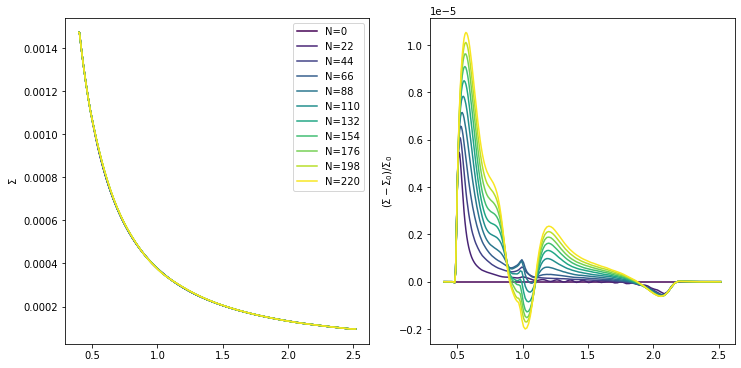

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sigma = d.get(dim="2d", var="mass density", N=0)
sigma1d0 = np.average(sigma.data, axis=1)
Nmax = d.avail()["Nsnapshots"]
cmap = mpl.cm.get_cmap("viridis")
for n in range(0, Nmax, max(1, Nmax//10)):
    sigma = d.get(dim="2d", var="mass density", N=n)
    sigma1d = np.average(sigma.data, axis=1)
    rs = sigma.grid.get_coordinates("r")
    reldiff = (sigma1d - sigma1d0)#/sigma1d0
    color = cmap(n/Nmax)
    axes[0].plot(rs, sigma1d, label=f"N={n}", color=color)
    axes[1].plot(rs, reldiff, color=color)
axes[0].set_ylabel(r"$\Sigma$")
axes[1].set_ylabel(r"$(\Sigma - \Sigma_0) / \Sigma_0$")
axes[0].legend()

(-0.2, 0.2)

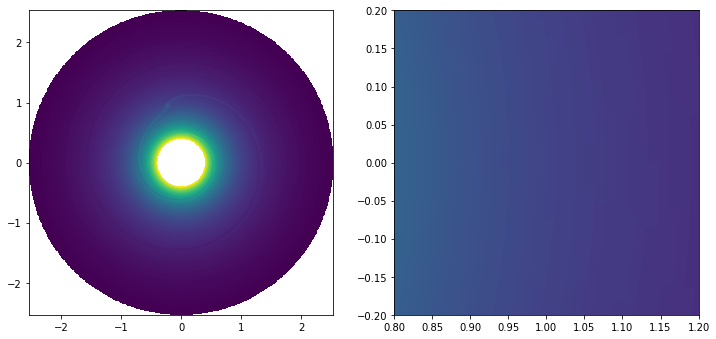

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sigma = d.get(dim="2d", var="mass density", N=Nmax-1)
sigma1d = np.average(sigma.data, axis=1)
rs = sigma.grid.get_interfaces("r")
phis = sigma.grid.get_interfaces("phi")
PHIS, RS = np.meshgrid(phis, rs)
X = RS*np.cos(PHIS)
Y = RS*np.sin(PHIS)

ax = axes[0]
ax.pcolormesh(X.value,Y.value, sigma.data.value)
ax.set_aspect("equal")

ax = axes[1]
ax.pcolormesh(X.value,Y.value, sigma.data.value)
ax.set_aspect("equal")
ax.set_xlim(0.8,1.2)
ax.set_ylim(-0.2,0.2)

alpha 1.5
beta 1
q 2e-05
h 0.05
SigmaP 0.000376
OmegaP 1
b 0.020000000000000004
expected torque -4.049999999999999


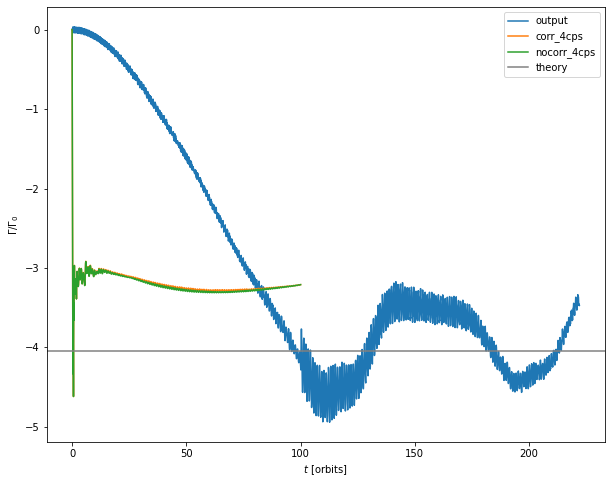

In [6]:
import yaml
with open("torque_test.yml", "r") as infile:
    params = yaml.safe_load(infile)

alpha = params["SigmaSlope"] #1.5 # - surface density power law index
flaringindex = params["FlaringIndex"]
beta = 1-2*flaringindex #1 # - temperature power law index
q = float(params["nbody"][1]["mass"])/float(params["nbody"][0]["mass"]) #2e-5 # reduced planet mass
h = params["AspectRatio"]#0.05 # aspect ratio
SigmaP = 3.76e-4 # Surface density at planet location
OmegaP = 1#2*np.pi
b = h*params["ThicknessSmoothing"] #0.4*h # smoothing lenght factor

Gamma0 = (q/h)**2 * SigmaP * OmegaP**2
# Paardekooper et al 2009

expected_torque = -(2.5 + 1.7*beta - 0.1*alpha) * (0.4/(b/h))**0.71

print("alpha", alpha)
print("beta", beta)
print("q", q)
print("h", h)
print("SigmaP", SigmaP)
print("OmegaP", OmegaP)
print("b", b)
print("expected torque", expected_torque)


fig, axes = plt.subplots(figsize=(20,8))

for outdir in ["output", "output_archive/corr_4cps/", "output_archive/nocorr_4cps/"]:

    fname = f"{outdir}/monitor/bigplanet2.dat"
    name = outdir.rstrip("/").split("/")[-1]
    try:
        time, torque = np.genfromtxt(fname, usecols=(6,17), unpack=True)
    except OSError:
        print(f"{fname} not found")
        continue
    time = time/(2*np.pi)
    ax.plot(time, torque/Gamma0, label=name)

    ax.set_xlabel(r"$t$ [orbits]")
    ax.set_ylabel(r"$\Gamma / \Gamma_0$")

ax.axhline(expected_torque, color="gray", label="theory")
ax.legend()

plt.show()

2e-05